# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [2]:
# load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
# count the total sample of fuel for each year
fuel_08 = df_08['fuel'].value_counts()
fuel_18 = df_18['fuel'].value_counts()

# total fuel counts
total_08 = fuel_08.sum()
total_18 = fuel_18.sum()

# get percentage of fuel share
fuel_percent_08 = (fuel_08/total_08) * 100
fuel_percent_18 = (fuel_18/total_18) * 100

# alternative Fuel in 2008
# ~ means not statement reads df_18['fuel'] is not in the list ['Gas','Gasoline']
alt_08 = df_08.loc[~df_08['fuel'].isin(['Gas','Gasoline'])].model.nunique()

# alternative Fuel in 2018
alt_18 = df_18.loc[df_18['fuel'].isin(['Electricity','Ethanol'])].model.nunique()

print(f'By 2018 there are {alt_18} unique models that runs with alternative \nfuels compared to 2008 when there are only {alt_08} uniqe models.\n')
print('Fuel Share Percentage\n')
print('Year 2008')
print(round(fuel_percent_08,3).to_string())
print('\nYear 2018')
print(round(fuel_percent_18,3).to_string())

By 2018 there are 26 unique models that runs with alternative 
fuels compared to 2008 when there are only 2 uniqe models.

Fuel Share Percentage

Year 2008
Gasoline    99.696
CNG          0.101
ethanol      0.101
gas          0.101

Year 2018
Gasoline       90.024
Gas             3.125
Ethanol         3.125
Diesel          2.284
Electricity     1.442


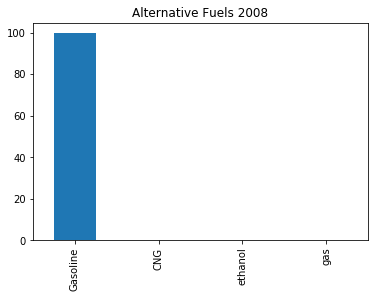

In [4]:
fuel_percent_08.plot(kind='bar', title='Alternative Fuels 2008');

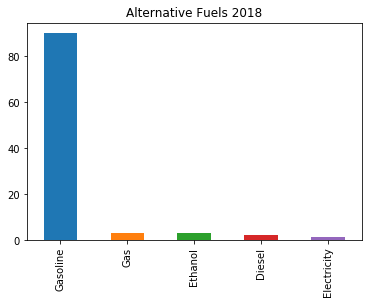

In [5]:
fuel_percent_18.plot(kind='bar', title='Alternative Fuels 2018');

### Q2: How much have vehicle classes improved in fuel economy?  

In [6]:
# Get a list of vehicle classes in 2008 and 2018
veh_class_08 = list(df_08['veh_class'].unique())
veh_class_18 = list(df_18['veh_class'].unique())

print('Vehicle classes not in 2008\n')
for v in veh_class_18:
    if v not in veh_class_08:
        print(v)

Vehicle classes not in 2008

small SUV
standard SUV
special purpose


In [7]:
# Select relevant columns
vc_mpg_08 = df_08[['veh_class','city_mpg','hwy_mpg','cmb_mpg']]
vc_mpg_18 = df_18[['veh_class','city_mpg','hwy_mpg','cmb_mpg']]

In [8]:
# 2008 mpg averages
mpg_df_08 = vc_mpg_08.groupby('veh_class').mean().round(3)
mpg_df_08['year'] = '2008'

In [9]:
# 2018 mpg averages
mpg_df_18 = vc_mpg_18.groupby('veh_class').mean().round(3)
mpg_df_18['year'] = '2018'

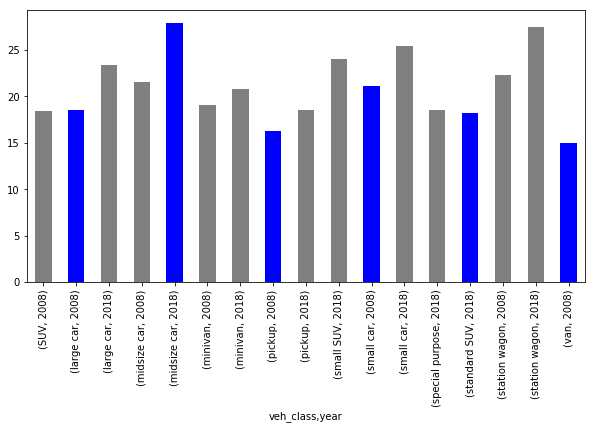

In [10]:
mpg_df_08_18 = pd.concat([mpg_df_18,mpg_df_08])
mpg_df_08_18.groupby(['veh_class','year']).cmb_mpg.mean().plot(
    kind='bar', color = ['grey','blue'] , figsize=(10,5));

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

### Q4: What features are associated with better fuel economy?